In [1]:
# Library

# Versions
import sys

# Styling
from colorama import Fore, Back, Style

# Data
import pandas as pd

# Numbers
import numpy as np

# Manipulation
import re
import datetime
import time
from sklearn import preprocessing

# Visualization
import matplotlib.pyplot as plt


# Model 
from sklearn. linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# SQL Libraries

# pip install mysql-connector-python-rf
# pip install PyMySQL

# Open terminal in mac and copy "conda install -c anaconda mysql-connector-python"
import mysql.connector

# importing 'mysql.connector' as mysql for convenient
import mysql.connector as mysql

# open terminal in mac and put "pip install PyMySQL"
import pymysql.cursors
import pymysql

In [2]:
import numpy as np
import pandas as pd

In [3]:
DB = pd.read_csv('PPtrainData.csv',encoding="UTF-8")

In [4]:
# Shape and size of data frame

DB_Shape=DB.shape
DB_Size=DB.size
print("\nDataset shape:",DB_Shape)
print("\n\nDataset size:",DB_Size)

# Row size
if DB_Shape[0]>50000:
    print(Fore.GREEN+"Rows:", Fore.BLACK+" very large")
    
elif DB_Shape[0]>25000 and DB_Shape[0]<50000:
    print(Fore.GREEN+"Rows:", Fore.BLACK+" large")
    
elif DB_Shape[0]>5000 and DB_Shape[0]<25000:
    print(Fore.GREEN+"Rows:", Fore.BLACK+" normal size")
    
elif DB_Shape[0]>1000 and DB_Shape[0]<5000:
    print(Fore.GREEN+"Rows:", Fore.BLACK+" is small")
    
elif DB_Shape[0]<1000:
    print(Fore.GREEN+"Rows:", Fore.BLACK+" very small")
    
# Column size
if DB_Shape[1]>100:
    print(Fore.GREEN+"Features:", Fore.BLACK+" very large")
    
elif DB_Shape[1]>50 and DB_Shape[1]<100:
    print(Fore.GREEN+"Features:", Fore.BLACK+" large")
    
elif DB_Shape[1]>25 and DB_Shape[1]<50:
    print(Fore.GREEN+"Features:", Fore.BLACK+" normal")
    
elif DB_Shape[1]>10 and DB_Shape[1]<25:
    print(Fore.GREEN+"Features:", Fore.BLACK+" small")
    
elif DB_Shape[1]<10:
    print(Fore.GREEN+"Features:", Fore.BLACK+" very small")
print(Style.RESET_ALL)


Dataset shape: (1516, 15)


Dataset size: 22740
Rows:  is small
Features:  small



In [5]:
DB.describe().T

,count,mean,std,min,25%,50%,75%,max
BrokenLease,1516.0,0.231530,0.421950,0.0,0.0,0.0,0.0,1.0
Evicted,1516.0,0.093668,0.291462,0.0,0.0,0.0,0.0,1.0
SuedForDamage,1516.0,0.019129,0.137025,0.0,0.0,0.0,0.0,1.0
SuedForRent,1516.0,0.042876,0.202644,0.0,0.0,0.0,0.0,1.0
status,1516.0,0.627309,0.483680,0.0,0.0,1.0,1.0,1.0
gcardOccupantCount,1516.0,1.109499,0.989657,0.0,0.0,1.0,2.0,4.0


In [6]:
# Data overview

# Displays the dataset for review

print(Fore.GREEN+"\nTop 5 rows of the dataset below:\n")
print(Fore.BLACK+"",DB.head())
print(Style.RESET_ALL)

print("Please wait . . . . . Processing in progress . . . . . ")
time.sleep(10) # Time delay

print(Fore.GREEN+"\nBottom 5 rows of the dataset below:\n")
print(Fore.BLACK+"",DB.tail())
print(Style.RESET_ALL)

Summary=DB.describe().T
Conti=Summary.index
Column_name=DB.columns
All=[]
for i in range(len(Conti)):
    for j in range(len(Column_name)):
        if Conti[i]!=Column_name[j]:
            All.append(Column_name[j])
Categorical=list(set(All)-set(Conti))
Continuous=list(set(All)-set(Categorical))
print(Fore.GREEN+"Continuous Variables:",Fore.BLACK+"",Continuous)
print(Fore.GREEN+"\nCategorical variables found in the dataset:\n",Fore.BLACK+"",Categorical)


Top 5 rows of the dataset below:

   phoneType1      city state         zip rentOwnFlag         DOB Gender   
0          M  Seabrook    TX  77586-3247           R  10/21/1996      F  \
1          M   Houston    TX  77025-2329           R   11/5/1990      M   
2        NaN  Fairburn    GA  30213-5121           R   6/19/1992      M   
3          M       NaN   NaN         NaN           R   4/24/1988      F   
4          M  Portland    OR  97205-1718           R  12/17/1993      M   

   BrokenLease  Evicted  SuedForDamage  SuedForRent  status   
0            0        1              0            0       0  \
1            1        0              0            0       0   
2            0        1              1            1       0   
3            0        1              0            0       0   
4            1        0              0            0       0   

                trfsrcName gcardPreferedFloorplanGroupId  gcardOccupantCount  
0         Property Website                    Z00000000

In [51]:
# Missing value treatment

Row=DB.shape[0]
Column=DB.shape[1]

print(Fore.GREEN+"\nMissing or null values:")
print(Style.RESET_ALL)
print(DB.isnull().sum())


import time
time.sleep(10)

print(Fore.GREEN+"\n\nDo you wish to do any replacements ? ",Fore.BLACK+"<yes> or <no>")
answer_replacement=str(input())

if answer_replacement=='yes':
    print(Fore.GREEN+"\nDo you want to replce missing values by",Fore.BLACK+"<zero> or <median> or <mean> or <drop> ?")
    print(Style.RESET_ALL)
    Replace_option=str(input())
    if Replace_option=='zero':
        DB = DB.fillna('0')
        print(Fore.GREEN+"Replaced all missing values by ZERO")
    elif Replace_option=='median':
        DB = DB.replace({'NaN':DB.median()})
        print(Fore.GREEN+"Replaced all missing values by MEDIAN")
    elif Replace_option=='mean':
        DB = DB.replace({'NaN':DB.mean()})
        print(Fore.GREEN+"Replaced all missing values by MEAN")
    elif Replace_option=='drop':
        DB = DB.dropna()
        print(Fore.GREEN+"Rows with mising values have been dropped")
        print(Fore.GREEN+"\nCurrent shape of dataset is:",Fore.BLACK+"",DB.shape)
        # Variables "ROW & Column" defined during data input. Size of original data
        new_size=100-(100*DB.size/(Row*Column))  
        print(Fore.GREEN+"\nDataset has lost",Fore.BLACK+"",new_size,"% of data")
        if new_size>50:
            print(Fore.RED+"Caution: We have lost majority of our data and related info ")
    print(Style.RESET_ALL) 

elif answer_replacement=='no':
    print("Data set good to be used, nothing to replace ")


Missing or null values:

phoneType1                       132
city                               7
state                              4
zip                                3
rentOwnFlag                        0
DOB                                0
Gender                           565
BrokenLease                        0
Evicted                            0
SuedForDamage                      0
SuedForRent                        0
status                             0
trfsrcName                         0
gcardPreferedFloorplanGroupId      3
gcardOccupantCount                 0
dtype: int64


Do you wish to do any replacements ?  <yes> or <no>


KeyboardInterrupt: Interrupted by user

In [7]:
DB.shape

(1516, 15)

In [8]:
print(Fore.GREEN+"\nCategorical variables found in the dataset:\n",Fore.BLACK+"",Categorical)
print(Fore.GREEN+"\n\nDo you wish to convert categorical features to continuous ? ",Fore.BLACK+"<yes> or <no>")
answer_cat_con=str(input())
le = preprocessing.LabelEncoder()
if answer_cat_con=='yes':
    print(Fore.GREEN+"Enter the name of feature columns separated by <,>")
    Transform=str(input())
    print(Fore.GREEN+"\nYou have chosen the following:\n",Fore.BLACK+"",Transform)
    Trans = list(Transform.split(","))
    for i in range(len(Trans)):
        a=Trans[i]
        DB[a] = le.fit_transform(DB[a])

print(Fore.GREEN+"\nTop 5 rows of the dataset below:\n")
print(Fore.BLACK+"",DB.head())
print(Style.RESET_ALL) 

shape=DB.shape
Row=shape[0]
Column=shape[1]


Categorical variables found in the dataset:
  ['rentOwnFlag', 'DOB', 'gcardPreferedFloorplanGroupId', 'zip', 'trfsrcName', 'city', 'phoneType1', 'state', 'Gender']


Do you wish to convert categorical features to continuous ?  <yes> or <no>
yes
Enter the name of feature columns separated by <,>
rentOwnFlag,DOB,gcardPreferedFloorplanGroupId,zip,trfsrcName,city,phoneType1,state,Gender

You have chosen the following:
  rentOwnFlag,DOB,gcardPreferedFloorplanGroupId,zip,trfsrcName,city,phoneType1,state,Gender

Top 5 rows of the dataset below:

    phoneType1  city  state   zip  rentOwnFlag  DOB  Gender  BrokenLease   
0           1   473     40   735            3  193       0            0  \
1           1   235     40   642            3  346       1            1   
2           3   170      9   267            3  982       1            0   
3           1   574     46  1268            3  765       0            0   
4           1   408     35  1150            3  383       1            1   

  

In [9]:
DB.describe().T

,count,mean,std,min,25%,50%,75%,max
phoneType1,1516.0,0.816623,0.841585,0.0,0.00,1.0,1.00,3.0
city,1516.0,272.566623,172.418216,0.0,120.00,258.5,421.25,574.0
state,1516.0,24.611478,15.451279,0.0,7.00,27.0,40.00,46.0
zip,1516.0,633.374670,362.725902,0.0,313.75,639.5,940.00,1268.0
rentOwnFlag,1516.0,2.276385,1.207019,0.0,2.00,3.0,3.00,3.0
DOB,1516.0,663.939314,413.525781,0.0,302.75,659.5,1025.25,1383.0
Gender,1516.0,1.457784,1.276417,0.0,0.00,1.0,3.00,3.0
BrokenLease,1516.0,0.231530,0.421950,0.0,0.00,0.0,0.00,1.0
Evicted,1516.0,0.093668,0.291462,0.0,0.00,0.0,0.00,1.0
SuedForDamage,1516.0,0.019129,0.137025,0.0,0.00,0.0,0.00,1.0


In [11]:
# Data split: Independent vs target variable

y = DB['status']                  # Target variable
X = DB.drop(['status'],axis=1)    # Predictor variable

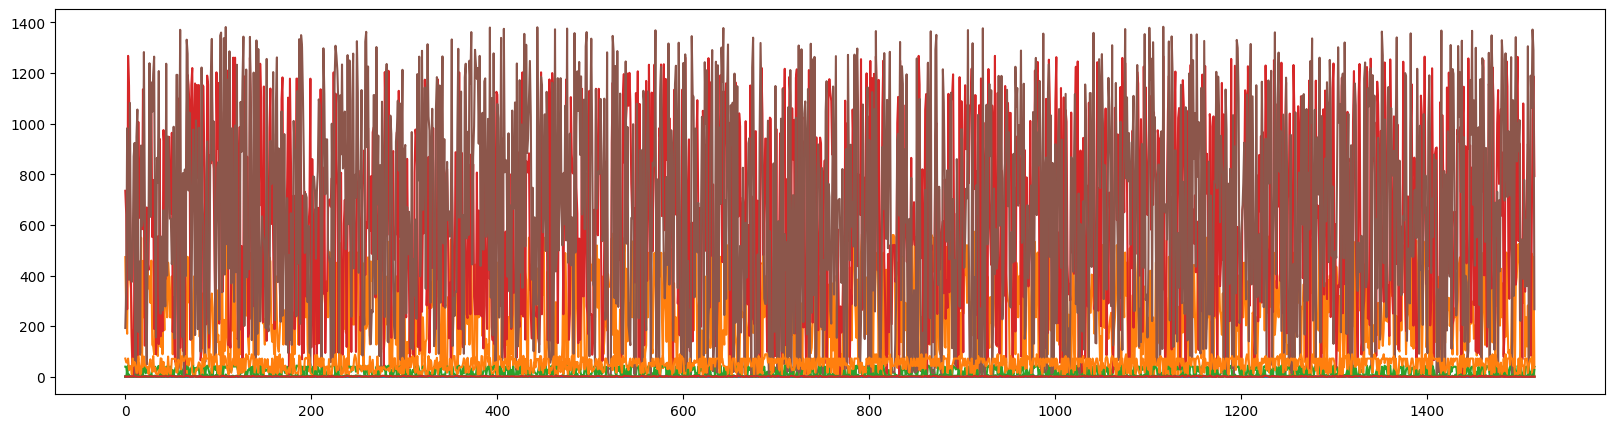

In [12]:
# Plot: Data distribution (combined data)

plt.subplots(figsize=(20,5))
plt.plot(X)
plt.show()

In [13]:
# Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [15]:
# Scaling

from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)   # Scale train data
X_test_scaled = StandardScaler().fit_transform(X_test)     # Scale test data

DB_Original_scaled=StandardScaler().fit_transform(DB)      # Scale original data

In [17]:
Train=pd.DataFrame(X_train_scaled)
Train_DB=Train.describe().T

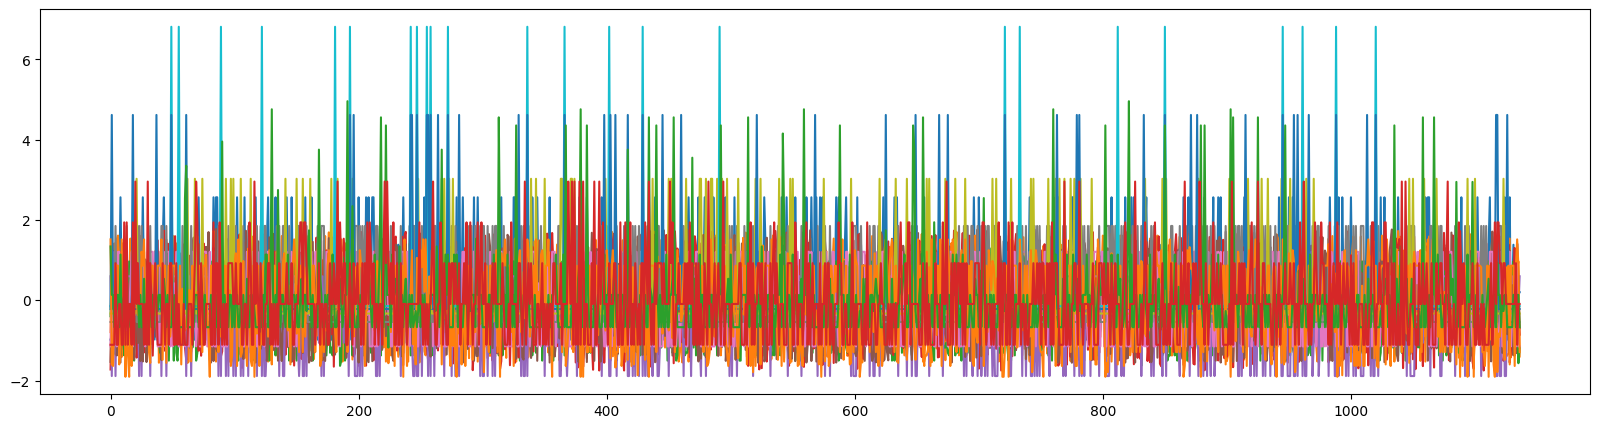

In [18]:
plt.subplots(figsize=(20,5))
plt.plot(X_train_scaled)
plt.show()

In [19]:
# Check if the sampled population are statistically equal

Orig_DB=pd.DataFrame(DB_Original_scaled)
Original_DB=Orig_DB.describe().T

In [22]:
# Logistic Regression
LogR = LogisticRegression()
LogR.fit(X_train_scaled, y_train)

y_pred=LogR.predict(X_train_scaled)  #Shift + Tab
LogR_Accuracy_Train = accuracy_score(y_true=y_train, y_pred=y_pred)
print("Train Accuracy : ", LogR_Accuracy_Train)

y_pred = LogR.predict(X_test_scaled)
LogR_Accuracy_Test = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Test Accuracy : ", LogR_Accuracy_Test)

Train Accuracy :  0.6490765171503958
Test Accuracy :  0.6094986807387863


In [24]:
# NB - Find the best NBs kernels

k=[BernoulliNB,GaussianNB]
for i in range (len(k)):
    NB_Classifier = k[i]()
    NB_Classifier.fit(X_train_scaled, y_train)
    print ('kernel is =',k[i], '\tScore=',NB_Classifier.score(X_test_scaled, y_test))

kernel is = <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 0.6596306068601583
kernel is = <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 0.6728232189973615


In [25]:
# SVM - to find the best parameters

from sklearn.svm import SVC

c=np.arange(0.1,1.1,0.1)  # Range of C values

kernels=['linear','rbf','sigmoid','poly']  # Range of kernels

# Loop to find the best parameters for C and Kernels

for k in range (len(kernels)):
    for i in range (len(c)):
        SVM_Classifier = SVC(C=c[i],kernel=kernels[k])
        SVM_Classifier.fit(X_train_scaled, y_train)
        print ('C=',round(c[i],2),"\tKernel=",kernels[k],'\tScore=',SVM_Classifier.score(X_test_scaled, y_test))

C= 0.1 	Kernel= linear 	Score= 0.5936675461741425
C= 0.2 	Kernel= linear 	Score= 0.5936675461741425
C= 0.3 	Kernel= linear 	Score= 0.5936675461741425
C= 0.4 	Kernel= linear 	Score= 0.5936675461741425
C= 0.5 	Kernel= linear 	Score= 0.5936675461741425
C= 0.6 	Kernel= linear 	Score= 0.5936675461741425
C= 0.7 	Kernel= linear 	Score= 0.5936675461741425
C= 0.8 	Kernel= linear 	Score= 0.5936675461741425
C= 0.9 	Kernel= linear 	Score= 0.5936675461741425
C= 1.0 	Kernel= linear 	Score= 0.5936675461741425
C= 0.1 	Kernel= rbf 	Score= 0.5936675461741425
C= 0.2 	Kernel= rbf 	Score= 0.5936675461741425
C= 0.3 	Kernel= rbf 	Score= 0.5989445910290238
C= 0.4 	Kernel= rbf 	Score= 0.6253298153034301
C= 0.5 	Kernel= rbf 	Score= 0.6464379947229552
C= 0.6 	Kernel= rbf 	Score= 0.6464379947229552
C= 0.7 	Kernel= rbf 	Score= 0.6490765171503958
C= 0.8 	Kernel= rbf 	Score= 0.6464379947229552
C= 0.9 	Kernel= rbf 	Score= 0.6437994722955145
C= 1.0 	Kernel= rbf 	Score= 0.6437994722955145
C= 0.1 	Kernel= sigmoid 	Score

In [26]:
# SVM - Model
from sklearn.svm import SVC
SVM = SVC(C=0.3,kernel='linear')
SVM.fit(X_train_scaled, y_train)

SVM_Accuracy=SVM.score(X_train_scaled, y_train)
print("Train Accuracy : ", SVM_Accuracy)

SVM_Accuracy=SVM.score(X_test_scaled, y_test)
print("Test Accuracy : ", SVM_Accuracy)

Train Accuracy :  0.6385224274406333
Test Accuracy :  0.5936675461741425


In [27]:
# KNN - choosing the K value

# creating odd list of K for KNN
myList = list(range(2,20))  # k=arange(1,20,2)

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


In [28]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(X_train_scaled, y_train)

y_pred = KNN.predict(X_train_scaled)
KNN_Accuracy_Train=accuracy_score(y_train, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred = KNN.predict(X_test_scaled)
KNN_Accuracy_Test=accuracy_score(y_test, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.7053649956024626
Train Accuracy :  0.6437994722955145


In [29]:
# Decision Tree

# Library
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Model
model_DT=DecisionTreeClassifier(criterion='entropy',  # 1
                                splitter='best',     # 3
                                max_depth=5,       # 2
                                min_samples_split=2,  
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=None,
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                class_weight=None,
                                ccp_alpha=0.0)

model_DT.fit(X_train_scaled, y_train)

# Accuracy
DT_Train=model_DT.score(X_train_scaled, y_train)
DT_Test=model_DT.score(X_test_scaled, y_test)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.6613896218117854
Test Accuracy: 0.6701846965699209


In [30]:
# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=100,        # CV
                                    criterion='gini',
                                    max_depth=4,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='sqrt',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.001,
                                    max_samples=None,)
model_RF.fit(X_train_scaled, y_train)

# Accuracy
pred_RF = model_RF.predict(X_test_scaled)
RF_Train = model_RF.score(X_train_scaled, y_train)
RF_Test = accuracy_score(y_test, pred_RF)

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 0.6983289357959542
Test Accuracy: 0.5963060686015831


In [34]:
# GRADIENT BOOSTING


# Library
from sklearn.ensemble import GradientBoostingClassifier

# Model
model = GradientBoostingClassifier(
                                    learning_rate=0.1,
                                    n_estimators=500,
                                    subsample=1.0,
                                    criterion='friedman_mse',
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_depth=3,
                                    min_impurity_decrease=0.0,
                                    init=None,
                                    random_state=None,
                                    max_features=None,
                                    verbose=1,
                                    max_leaf_nodes=None,
                                    warm_start=False,
                                    validation_fraction=0.1,
                                    n_iter_no_change=None,
                                    tol=0.0001,
                                    ccp_alpha=0.0)
model_GB = model.fit(X_train_scaled, y_train)

# Accuracy
GB_Train = model_GB.score(X_train_scaled, y_train)
pred_GB =model_GB.predict(X_test_scaled)
acc_GB = accuracy_score(y_test, pred_GB)

print("Training Accuracy:",GB_Train)
print("Testing Accuracy:",acc_GB)

      Iter       Train Loss   Remaining Time 
         1           1.2807            1.00s
         2           1.2576            1.00s
         3           1.2384            1.22s
         4           1.2223            1.18s
         5           1.2090            1.24s
         6           1.1941            1.20s
         7           1.1825            1.16s
         8           1.1725            1.14s
         9           1.1630            1.12s
        10           1.1551            1.10s
        20           1.0839            0.95s
        30           1.0317            0.88s
        40           0.9947            0.85s
        50           0.9577            0.83s
        60           0.9228            0.81s
        70           0.8970            0.80s
        80           0.8724            0.78s
        90           0.8441            0.77s
       100           0.8218            0.74s
       200           0.6562            0.54s
       300           0.5427            0.36s
       40

In [36]:
# Stress Test

DB_XY = X.join(y)
# configure bootstrap

values = DB_XY.values

n_iterations = 5        # Number of bootstrap samples to create
n_size = int(len(DB) * 1)    # size of a bootstrap sample
from sklearn.utils import resample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    Stress_Test = RandomForestClassifier(n_estimators=50)
    Stress_Test.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
    y_test = test[:,-1]    # Take the target column for all rows in test set
    # evaluate model
    predictions = Stress_Test.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = Stress_Test.score(test[:, :-1] , y_test)
    print("Iteration completed:",i)
    stats.append(score)

Iteration completed: 0
Iteration completed: 1
Iteration completed: 2
Iteration completed: 3
Iteration completed: 4


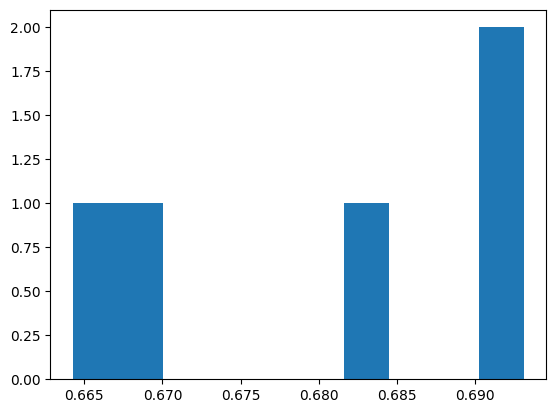

95.0 confidence interval 66.5% and 69.3%


In [37]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [38]:
import pickle
Pickled_model = pickle.dumps(model) 
print(Fore.GREEN+"\nCompleted pickling the model")

print(Fore.GREEN+"\nReload the pickled model")
Pickled_Load = pickle.loads(Pickled_model)

y_pred_1 = Pickled_Load.predict(X_test)


Completed pickling the model

Reload the pickled model


C:\Users\akandala\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


In [39]:
y_pred_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
DB.query('status=="0"')

,phoneType1,city,state,zip,rentOwnFlag,DOB,Gender,BrokenLease,Evicted,SuedForDamage,SuedForRent,status,trfsrcName,gcardPreferedFloorplanGroupId,gcardOccupantCount


In [44]:
DB.query('status==0')

,phoneType1,city,state,zip,rentOwnFlag,DOB,Gender,BrokenLease,Evicted,SuedForDamage,SuedForRent,status,trfsrcName,gcardPreferedFloorplanGroupId,gcardOccupantCount
0,1,473,40,735,3,193,0,0,1,0,0,0,72,0,1
1,1,235,40,642,3,346,1,1,0,0,0,0,57,0,0
2,3,170,9,267,3,982,1,0,1,1,1,0,56,25,1
3,1,574,46,1268,3,765,0,0,1,0,0,0,72,3,0
4,1,408,35,1150,3,383,1,1,0,0,0,0,26,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,3,340,20,84,3,1190,1,0,0,0,0,0,72,0,1
1512,1,487,14,493,3,1063,3,0,0,0,0,0,72,0,0
1513,3,7,30,1015,3,1372,3,0,0,0,0,0,7,9,1
1514,0,474,44,1188,3,1290,1,0,0,0,0,0,55,0,1


In [42]:
DB.head(5)


,phoneType1,city,state,zip,rentOwnFlag,DOB,Gender,BrokenLease,Evicted,SuedForDamage,SuedForRent,status,trfsrcName,gcardPreferedFloorplanGroupId,gcardOccupantCount
0,1,473,40,735,3,193,0,0,1,0,0,0,72,0,1
1,1,235,40,642,3,346,1,1,0,0,0,0,57,0,0
2,3,170,9,267,3,982,1,0,1,1,1,0,56,25,1
3,1,574,46,1268,3,765,0,0,1,0,0,0,72,3,0
4,1,408,35,1150,3,383,1,1,0,0,0,0,26,9,1


In [48]:
!pip3 install seaborn


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: C:\Users\akandala\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



     -------------------------------------- 293.3/293.3 kB 3.6 MB/s eta 0:00:00


<AxesSubplot: >

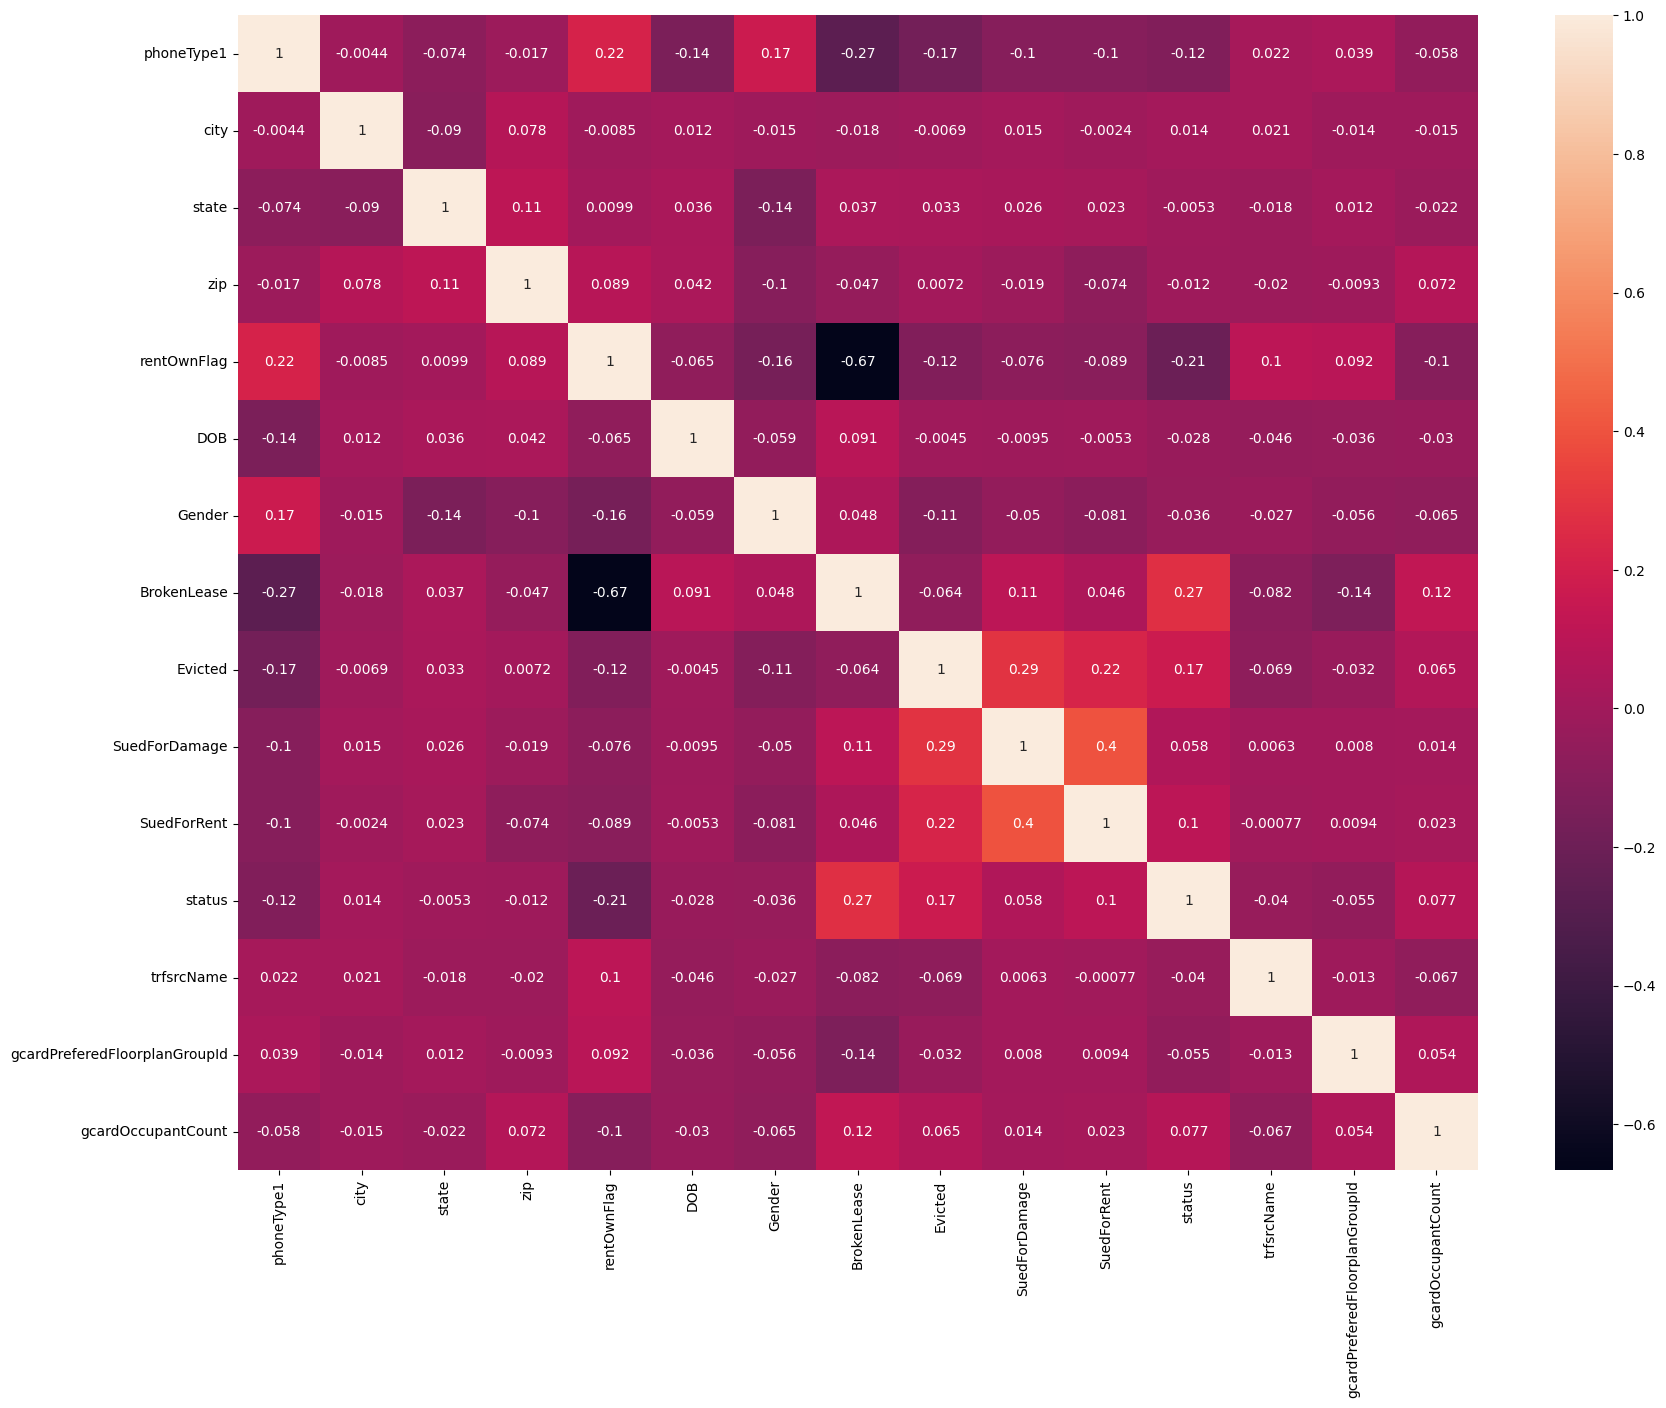

In [50]:
import seaborn as sn
corr = DB.corr()
plt.figure(figsize=(20,15))
sn.heatmap(corr, annot = True)